<a href="https://colab.research.google.com/github/motorio0829/DL-for-AI/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6978 - loss: 1.0582 - val_accuracy: 0.9028 - val_loss: 0.3147
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9133 - loss: 0.2776 - val_accuracy: 0.9326 - val_loss: 0.2194
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9465 - loss: 0.1733 - val_accuracy: 0.9538 - val_loss: 0.1521
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9621 - loss: 0.1240 - val_accuracy: 0.9128 - val_loss: 0.2764
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0909 - val_accuracy: 0.9646 - val_loss: 0.1287
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.0671 - val_accuracy: 0.9635 - val_loss: 0.1370
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0470 - val_accuracy: 0.9655 - val_loss: 0.1227
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0345 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

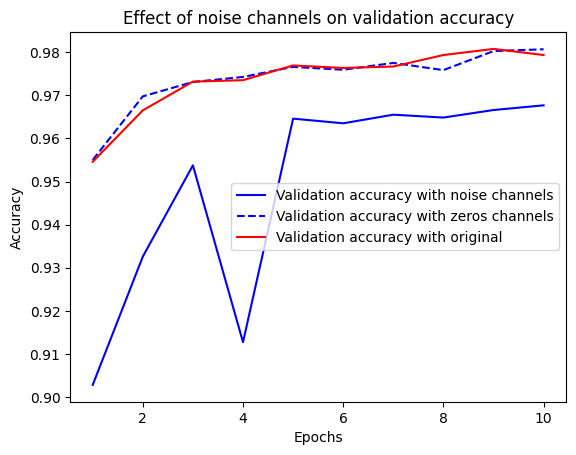

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffle = model.fit(train_images, random_train_labels,
          epochs=50,
          batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1059 - loss: 2.3327 - val_accuracy: 0.1071 - val_loss: 2.3051
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1177 - loss: 2.2976 - val_accuracy: 0.1047 - val_loss: 2.3099
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1308 - loss: 2.2890 - val_accuracy: 0.1010 - val_loss: 2.3142
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1413 - loss: 2.2769 - val_accuracy: 0.0988 - val_loss: 2.3276
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1523 - loss: 2.2599 - val_accuracy: 0.1007 - val_loss: 2.3337
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1684 - loss: 2.2393 - val_accuracy: 0.1051 - val_loss: 2.3480
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1796 - loss: 2.2206 - val_accuracy: 0.1004 - val_loss: 2.3690
Epoch 8/50
 96/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2074 - loss: 2.1788

KeyboardInterrupt: 

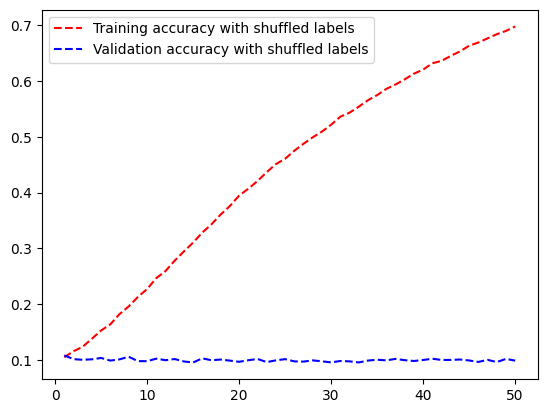

In [6]:
train_acc_shuffle = history_shuffle.history['accuracy']
val_acc_shuffle = history_shuffle.history['val_accuracy']
epochs = range(1, 51)
plt.plot(epochs, train_acc_shuffle, "r--",
         label="Training accuracy with shuffled labels")
plt.plot(epochs, val_acc_shuffle, "b--",
         label="Validation accuracy with shuffled labels")
plt.legend()
plt.show()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [23]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
hist_lr_explode = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4273 - loss: 3722.2246 - val_accuracy: 0.2840 - val_loss: 1.9513
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2796 - loss: 3.2251 - val_accuracy: 0.2770 - val_loss: 2.0962
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2437 - loss: 2.4783 - val_accuracy: 0.2812 - val_loss: 2.1479
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2490 - loss: 3.0020 - val_accuracy: 0.2697 - val_loss: 2.0180
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2217 - loss: 2.3410 - val_accuracy: 0.2351 - val_loss: 2.2604
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2287 - loss: 2.3223 - val_accuracy: 0.2552 - val_loss: 1.9842
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2467 - loss: 2.5949 - val_accuracy: 0.2037 - val_loss: 2.0846
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2316 - loss: 2.3597 - val_accuracy:

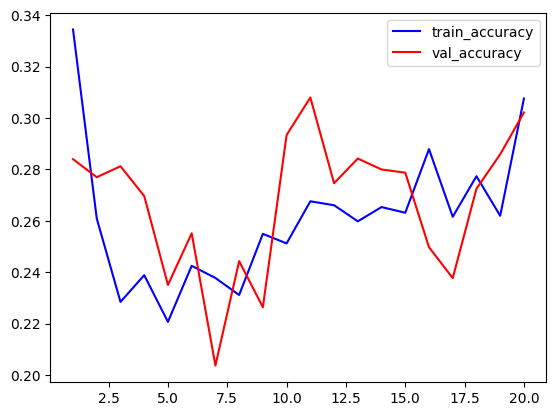

In [24]:
train_acc = hist_lr_explode.history['accuracy']
val_acc = hist_lr_explode.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train_acc, 'b', label = 'train_accuracy')
plt.plot(epochs, val_acc, 'r', label = 'val_accuracy')
plt.legend()
plt.show()

In [25]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_history = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6274 - loss: 160.6408 - val_accuracy: 0.6585 - val_loss: 1.0641
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6788 - loss: 1.3600 - val_accuracy: 0.8040 - val_loss: 1.5347
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7375 - loss: 1.1874 - val_accuracy: 0.7843 - val_loss: 0.9438
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7528 - loss: 1.1243 - val_accuracy: 0.7711 - val_loss: 0.9853
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 1.0679 - val_accuracy: 0.7318 - val_loss: 1.9815
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.9932 - val_accuracy: 0.7200 - val_loss: 0.8849
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7665 - loss: 0.9637 - val_accuracy: 0.8077 - val_loss: 1.0193
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7775 - loss: 0.9138 - val_accuracy: 

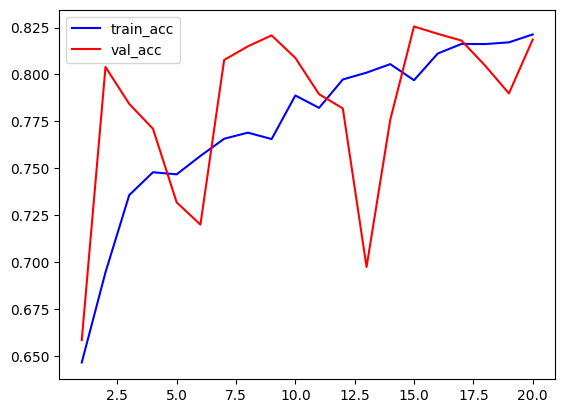

In [26]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train_acc, 'b', label = 'train_acc')
plt.plot(epochs, val_acc, 'r', label = 'val_acc')
plt.legend()
plt.show()

**The same model with a more appropriate learning rate**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_history = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8340 - loss: 0.8540 - val_accuracy: 0.9609 - val_loss: 0.1403
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1287 - val_accuracy: 0.9628 - val_loss: 0.1470
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.0959 - val_accuracy: 0.9656 - val_loss: 0.1593
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0811 - val_accuracy: 0.9721 - val_loss: 0.1509
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9827 - loss: 0.0662 - val_accuracy: 0.9722 - val_loss: 0.1628
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0539 - val_accuracy: 0.9709 - val_loss: 0.1794
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0489 - val_accuracy: 0.9715 - val_loss: 0.1811
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0342 - val_accuracy: 0.

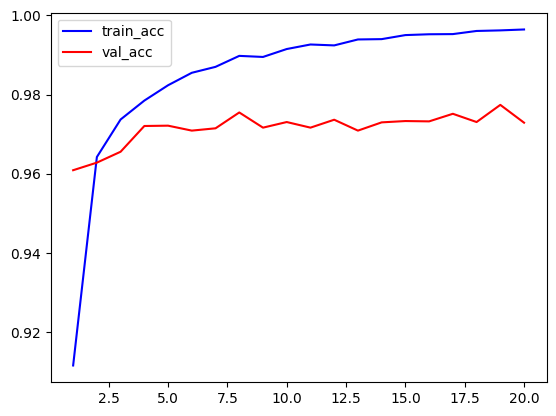

In [28]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train_acc, 'b', label = 'train_acc')
plt.plot(epochs, val_acc, 'r', label = 'val_acc')
plt.legend()
plt.show()

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [8]:
model = keras.Sequential([
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7362 - loss: 1.0480 - val_accuracy: 0.9062 - val_loss: 0.3600
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8979 - loss: 0.3711 - val_accuracy: 0.9151 - val_loss: 0.3112
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.3270 - val_accuracy: 0.9170 - val_loss: 0.2939
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.3084 - val_accuracy: 0.9218 - val_loss: 0.2853
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9196 - loss: 0.2876 - val_accuracy: 0.9222 - val_loss: 0.2779
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9201 - loss: 0.2859 - val_accuracy: 0.9235 - val_loss: 0.2746
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9220 - loss: 0.2791 - val_accuracy: 0.9262 - val_loss: 0.2727
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9235 - loss: 0.2729 - val_accuracy: 0.

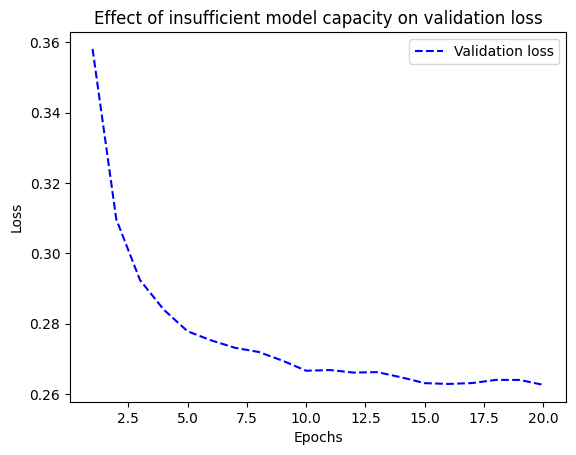

In [14]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8247 - loss: 0.6369 - val_accuracy: 0.9450 - val_loss: 0.1935
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9458 - loss: 0.1789 - val_accuracy: 0.9557 - val_loss: 0.1473
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1185 - val_accuracy: 0.9650 - val_loss: 0.1161
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0933 - val_accuracy: 0.9672 - val_loss: 0.1080
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9720 - val_loss: 0.0987
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0581 - val_accuracy: 0.9754 - val_loss: 0.0890
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9766 - val_loss: 0.0877
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.

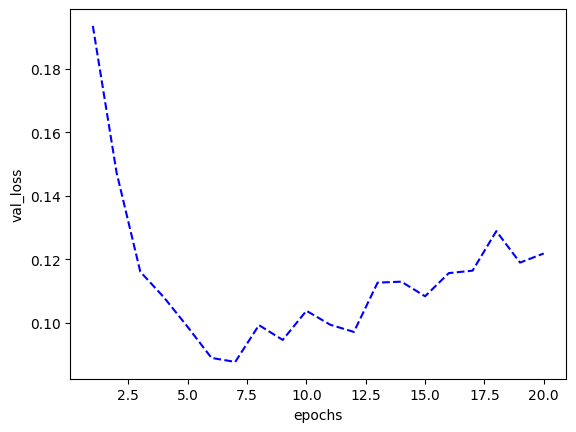

In [10]:
epochs = range(1,21)
plt.plot(epochs, history_large_model.history['val_loss'], 'b--')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6958 - loss: 0.6117 - val_accuracy: 0.8585 - val_loss: 0.4130
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8895 - loss: 0.3495 - val_accuracy: 0.8831 - val_loss: 0.3210
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9236 - loss: 0.2470 - val_accuracy: 0.8709 - val_loss: 0.3150
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9361 - loss: 0.1984 - val_accuracy: 0.8928 - val_loss: 0.2742
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9515 - loss: 0.1628 - val_accuracy: 0.8866 - val_loss: 0.2872
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9615 - loss: 0.1313 - val_accuracy: 0.8894 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9666 - loss: 0.1145 - val_accuracy: 0.8741 - val_loss: 0.3335
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accura

KeyboardInterrupt: 

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
epochs = range(1,21)
plt.plot(epochs, history_original.history['val_loss'], 'b--', label='original model')
plt.plot(epochs, history_smaller_model.history['val_loss'], 'r--', label='smaller model')
plt.plot(epochs, history_larger_model.history['val_loss'], 'g--', label='larger model')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6914 - loss: 0.6852 - val_accuracy: 0.8694 - val_loss: 0.4659
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8867 - loss: 0.4252 - val_accuracy: 0.8768 - val_loss: 0.4022
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9183 - loss: 0.3364 - val_accuracy: 0.8798 - val_loss: 0.3822
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9252 - loss: 0.2972 - val_accuracy: 0.8890 - val_loss: 0.3571
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9398 - loss: 0.2718 - val_accuracy: 0.8858 - val_loss: 0.3589
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9430 - loss: 0.2537 - val_accuracy: 0.8886 - val_loss: 0.3572
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9519 - loss: 0.2370 - val_accuracy: 0.8811 - val_loss: 0.3778
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9450 - loss: 0.2432 - val_accuracy: 0.8803 - v

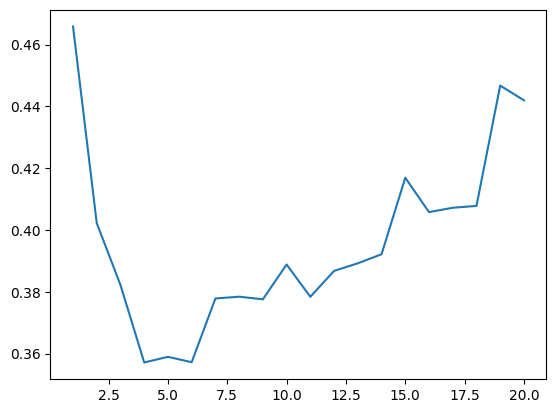

In [22]:
plt.plot(epochs, history_l2_reg.history['val_loss'])
plt.show()

**Different weight regularizers available in Keras**

In [23]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5692 - loss: 0.6721 - val_accuracy: 0.8434 - val_loss: 0.5290
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7276 - loss: 0.5530 - val_accuracy: 0.8729 - val_loss: 0.4198
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7953 - loss: 0.4596 - val_accuracy: 0.8719 - val_loss: 0.3581
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8351 - loss: 0.3957 - val_accuracy: 0.8804 - val_loss: 0.3178
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8749 - loss: 0.3405 - val_accuracy: 0.8919 - val_loss: 0.2869
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8855 - loss: 0.3072 - val_accuracy: 0.8930 - val_loss: 0.2759
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9140 - loss: 0.2575 - val_accuracy: 0.8916 - val_loss: 0.2741
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9212 - loss: 0.2316 - val_accuracy: 0.8883 - 

In [25]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    #layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    #layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_simple = model2.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6782 - loss: 0.6089 - val_accuracy: 0.8395 - val_loss: 0.4190
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8876 - loss: 0.3553 - val_accuracy: 0.8871 - val_loss: 0.3143
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9211 - loss: 0.2517 - val_accuracy: 0.8921 - val_loss: 0.2855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9381 - loss: 0.1993 - val_accuracy: 0.8533 - val_loss: 0.3544
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9445 - loss: 0.1704 - val_accuracy: 0.8707 - val_loss: 0.3272
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9532 - loss: 0.1473 - val_accuracy: 0.8832 - val_loss: 0.2991
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1150 - val_accuracy: 0.8860 - val_loss: 0.2969
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9732 - loss: 0.0969 - val_accuracy: 0.8844 - v

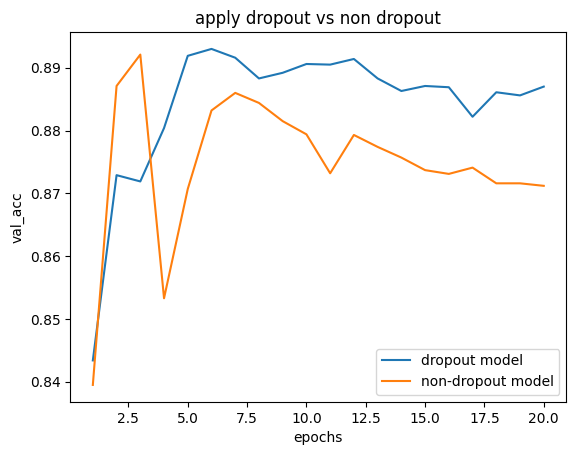

In [26]:
plt.plot(epochs, history_dropout.history['val_accuracy'], label = 'dropout model')
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.title('apply dropout vs non dropout')
plt.plot(epochs, history_simple.history['val_accuracy'], label = 'non-dropout model')
plt.legend()
plt.show()

## Summary